In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
data = pd.read_csv('creditcard.csv', header=0, sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


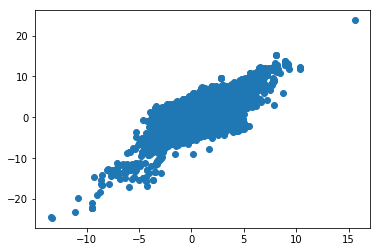

In [3]:
plt.plot(data.V9.astype(float), pd.to_numeric(data.V10), 'o')

In [4]:
f = lambda x, *k: k[0]+k[1]*x
def cost(funk, arg_list, koefs):
    k = 1/(len(arg_list[0])*2) 
    summa = 0
    for i in range(len(arg_list[0])):
        summa += (funk(*arg_list[:-1, i], *koefs)-arg_list[-1, i])**2
    return k*summa

def gd_2(f, f_arg_funkLin, f_arg_data, list_koef, dx=0.01, n=200, alfa = 0.01):
    grad = np.array([0.]*len(list_koef))
    list_koef = np.array(list_koef, dtype="float64")
    f_arg_data = np.array(f_arg_data, dtype="float64")
    for m in range(n):
        for i in range(len(list_koef)):
            koef_and_delta = np.concatenate((list_koef[:i], [list_koef[i]+dx], list_koef[i+1:]))
            grad[i] = alfa*(f(f_arg_funkLin, f_arg_data, koef_and_delta)-f(f_arg_funkLin, f_arg_data, list_koef))/dx
        list_koef -= grad
    return list_koef

In [5]:
def lr(f, *data_list, start_koefs = [0, 0]):
    koefs = gd_2(cost, f, data_list, start_koefs)
    print(koefs)
    def funk(*coord):
        res = koefs[0]
        for i in range(len(koefs)-1):
            res += koefs[i+1]*coord[i]
        return res
    return funk



[-0.007242    0.05013955]


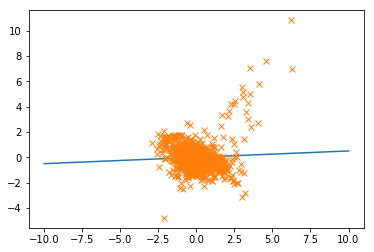

In [9]:
train_ix = np.random.choice(data.index, 1000, replace=False)
df_training = data.loc[train_ix]
df_test = data.drop(train_ix)
funk = lr(f, df_training.V9, df_training.V10)
x_pic = np.linspace(-10, 10,100)
y_pic = list(map(funk, x_pic))
plt.plot(x_pic, y_pic)
plt.plot(df_training.V9, df_training.V10, 'x')

In [10]:
koefs = gd_2(cost, f, [df_training.V9, df_training.V10], [0, 0])
c1 = cost(f, np.array([df_training.V9, df_training.V10]), koefs)
c2 = cost(f, np.array([df_test.V9, df_test.V10]), koefs)
print(c1, c2)

0.597865023113 0.594325789622
